In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn_image as isns
import torch
import cv2
import os

In [ ]:
images=np.load(r'C:\Users\ayush\Desktop\SEM4\research_project1\data\archive\brain_tumor_dataset\images.npy',allow_pickle=True)
lables=np.load(r'C:\Users\ayush\Desktop\SEM4\research_project1\data\archive\brain_tumor_dataset\labels.npy')
maskes=np.load(r'C:\Users\ayush\Desktop\SEM4\research_project1\data\archive\brain_tumor_dataset\masks.npy',allow_pickle=True)

In [ ]:
# this will create thicker lines and larger fonts than usual
isns.set_context("notebook")
sns.set_style("darkgrid")
# change image related settings
isns.set_image(cmap="deep", despine=True)  # set the colormap and despine the axes
isns.set_scalebar(color="red")  # change scalebar color

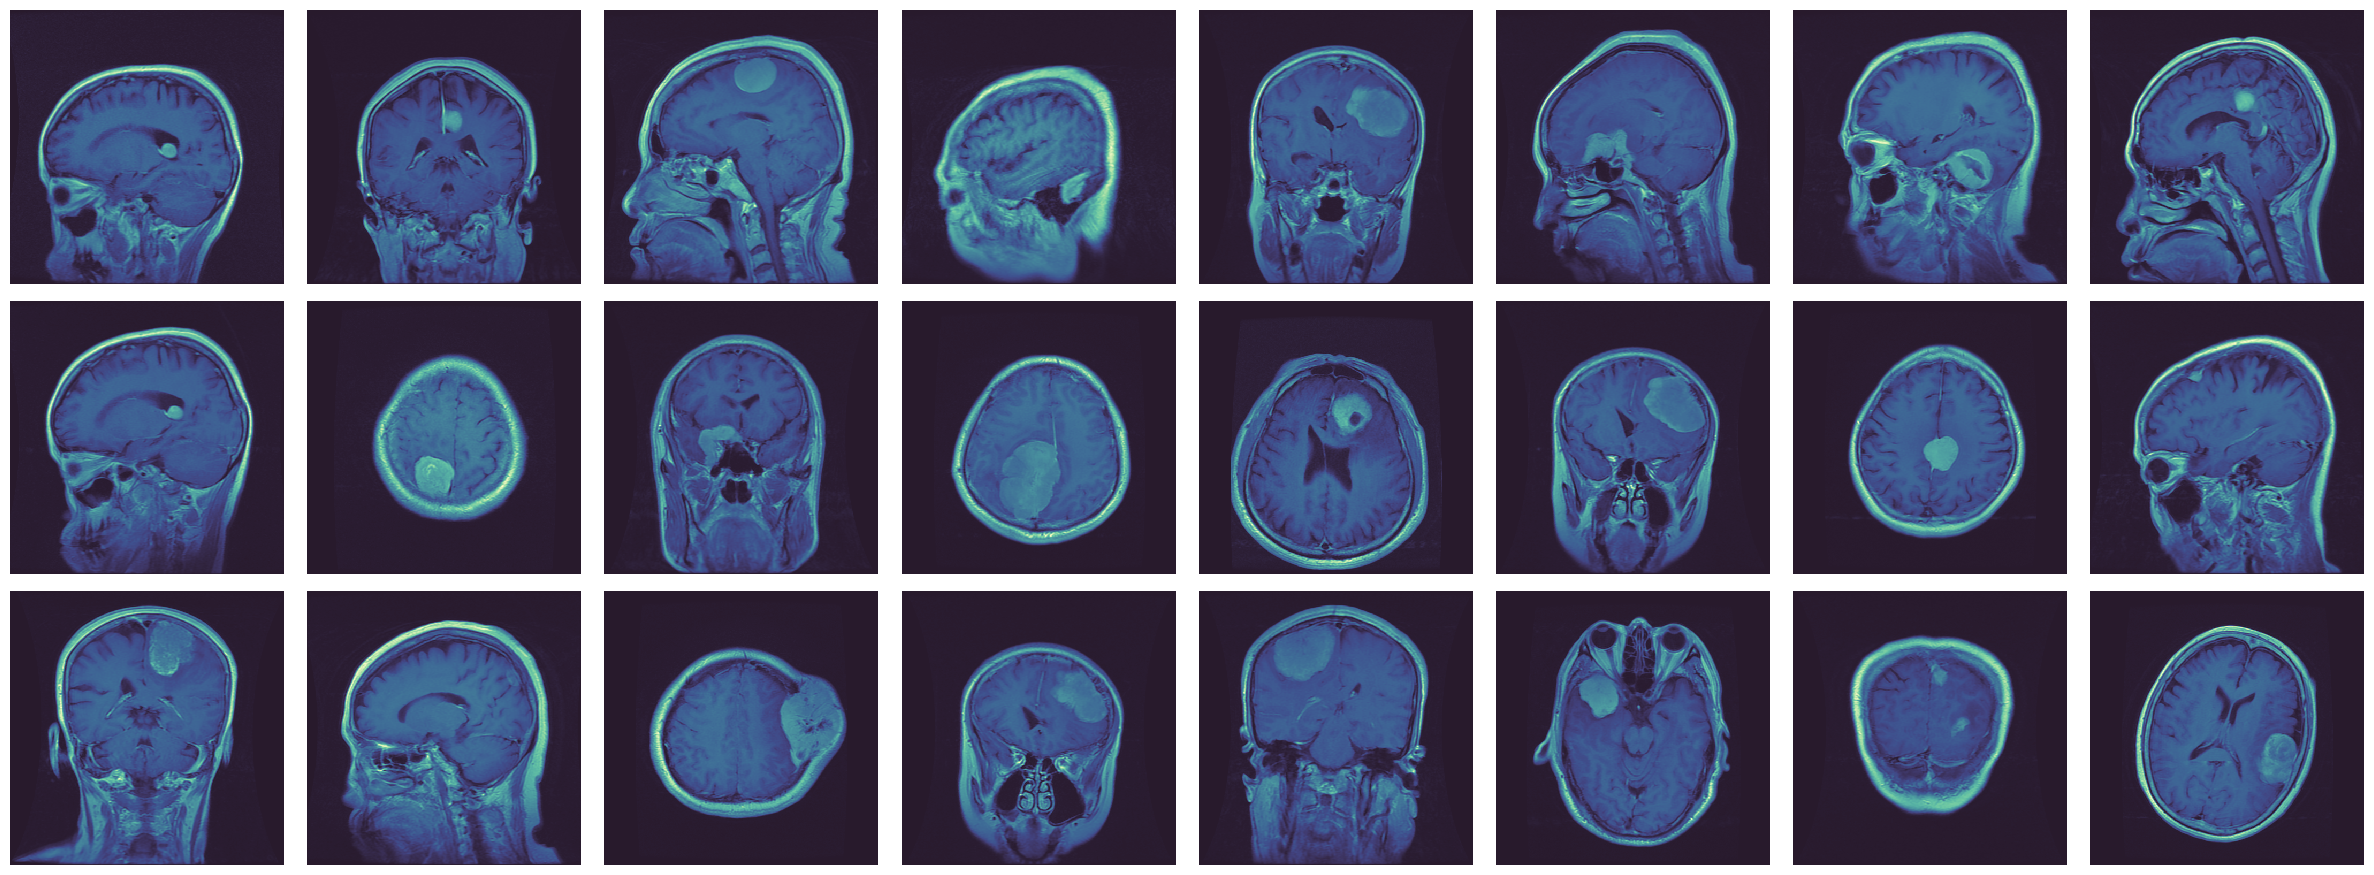

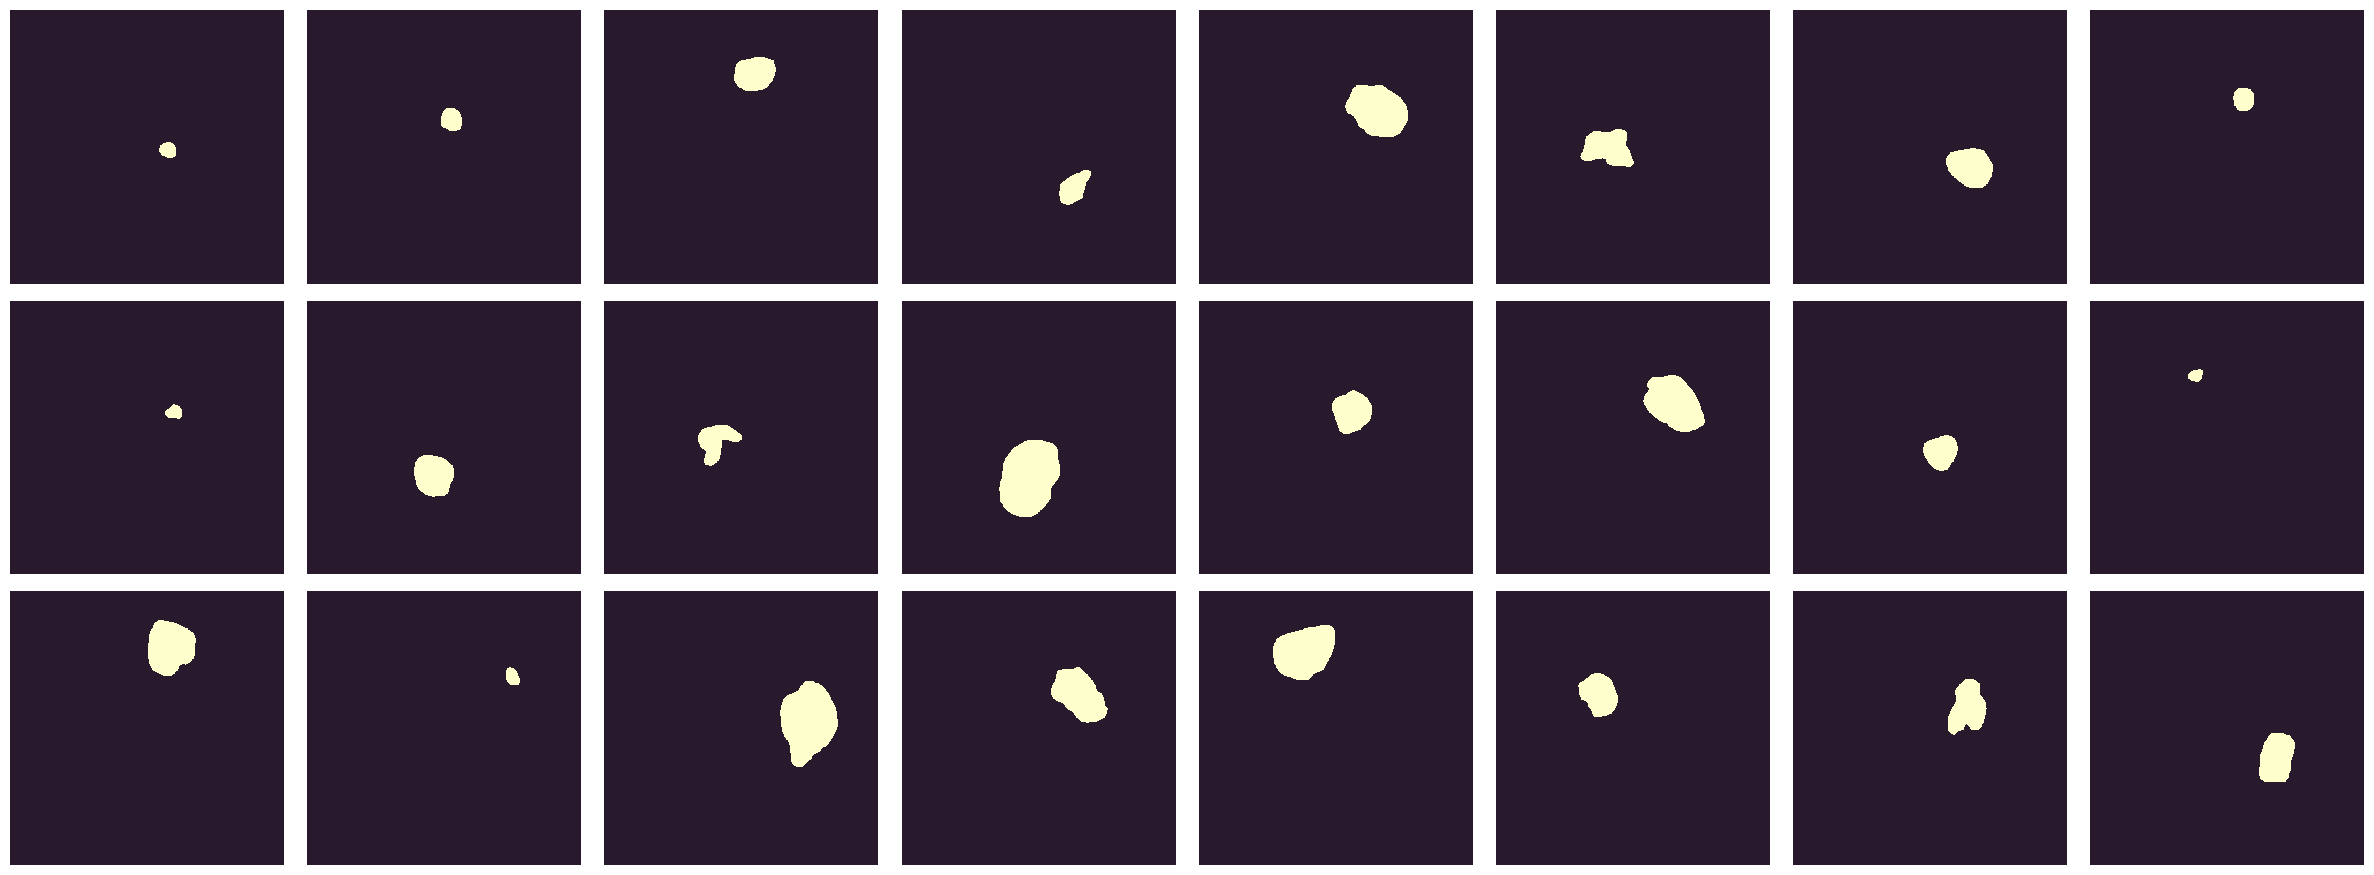

In [ ]:
def plot_layout(plot_mat,n=24):
    for j in plot_mat:
        fig, axes = plt.subplots(int(n/8),8)
        fig.set_figwidth(24)
        fig.set_figheight(9)
        ax= axes.ravel()
        for i in range (int(n/8)*8):
            ax[i].imshow(j[i])
            ax[i].set_axis_off()
        plt.tight_layout()
        plt.show()

plot_layout([images,maskes])

<Axes: ylabel='Count'>

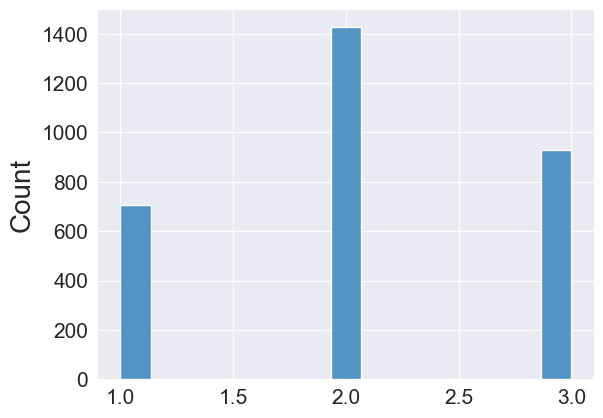

In [ ]:
sns.histplot(lables)

In [ ]:
from torchvision import datasets,models,transforms

In [ ]:
#Statistics Based on ImageNet Data for Normalisation
mean_nums = [0.485, 0.456, 0.406]
std_nums = [0.229, 0.224, 0.225]

data_transforms = {"train":transforms.Compose([
                    transforms.Resize((128,128)),
                    #Resizes all images into same dimension
                    transforms.RandomRotation(10),
                    # Rotates the images upto Max of 10 Degrees
                    transforms.RandomHorizontalFlip(p=0.4),
                    #Performs Horizantal Flip over images
                    transforms.ToTensor(),
                    # Coverts into Tensors
                    transforms.Normalize(mean = mean_nums, std=std_nums)]),
                    # Normalizes
                    "val": transforms.Compose([
                    transforms.Resize((128,128)),
                    #Performs Crop at Center and resizes it to 150x150
                    transforms.ToTensor(),
                    transforms.Normalize(mean=mean_nums, std = std_nums)
                    ])}

In [ ]:
maskes[0].shape

(512, 512)

In [ ]:
images_array = [np.resize(arr,(512,512,1)) for arr in images]
stacked_images = np.stack(images_array, axis=0)
masks_array = [np.resize(arr,(512,512,1)) for arr in maskes]
stacked_masks = np.stack(masks_array, axis=0)

In [ ]:
image_tensor = torch.from_numpy(stacked_images)
mask_tensor = torch.from_numpy(stacked_masks)

In [ ]:
print(image_tensor.shape)
print(mask_tensor.shape)

torch.Size([3064, 512, 512, 1])
torch.Size([3064, 512, 512, 1])


In [ ]:
data_path=r"C:/Users/ayush/Desktop/SEM4/research_project1/data/archive/brain_tumor_dataset/"

In [ ]:
images[0].shape

(512, 512)

In [ ]:
import torch
import torch.utils.data as data
import torchvision.transforms as transforms

# Define the data transforms for images and masks
data_transforms = {
    'image': transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'mask': transforms.Compose([
        transforms.ToTensor()
    ])
}

# Define a custom dataset class for your data
class ImageMaskDataset(data.Dataset):
    def __init__(self, images, masks, transforms):
        self.images = images
        self.masks = masks
        self.transforms = transforms

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image = self.images[index]
        mask = self.masks[index]

        # image = self.transforms['image'](image)
        # mask = self.transforms['mask'](mask)

        image = transforms.ToTensor()(image)
        mask = transforms.ToTensor()(mask)
        return image, mask

# Create an instance of the custom dataset class
dataset = ImageMaskDataset(image_tensor, mask_tensor, data_transforms)

# Split the dataset into training and validation sets
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [0.8, 0.2])

# Create a train loader for the dataset
train_loader = data.DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = data.DataLoader(val_dataset, batch_size=16, shuffle=True)

# Print the length of the train loader
print(len(train_loader))

154


In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler


In [ ]:
def load_split_train_test(datadir, valid_size=.2):
    train_data = datasets.ImageFolder(datadir, transform=data_transforms['train'])
    test_data = datasets.ImageFolder(datadir, transform=data_transforms['val'])
    print(train_data)
    num_train = len(train_data)
    indexes = list(range(num_train))
    split = int(np.floor(valid_size*num_train))
    np.random.shuffle(indexes)
    train, test = indexes[split:], indexes[:split]
    dataset_size = {"train": len(train), "val": len(test)}
    # Sampler for splitting train and val images
    train_sampler = SubsetRandomSampler(train)
    test_sampler = SubsetRandomSampler(test)
    trainloader = torch.utils.data.DataLoader(train_data,
                                              sampler=train_sampler, batch_size=16)
    # DataLoader provides data from traininng and validation in batches
    testloader = torch.utils.data.DataLoader(test_data,
                                             sampler=test_sampler, batch_size=16)
    return trainloader, testloader, dataset_size

In [ ]:
import matplotlib.pyplot as plt

for batch in train_loader:
    images, masks = batch
    # Visualize the first image and mask in the batch
    plt.imshow(images[0].permute(1, 2, 0).numpy())  # Convert the tensor to a numpy array and permute the axes
    plt.show()
    plt.imshow(masks[0].numpy())  # Convert the tensor to a numpy array
    plt.show()

TypeError: pic should be PIL Image or ndarray. Got <class 'torch.Tensor'>

In [ ]:
def load_split_train_test(datadir, valid_size=.2):
    train_data = datasets.ImageFolder(datadir, transform=data_transforms['train'])
    test_data = datasets.ImageFolder(datadir, transform=data_transforms['val'])
    print(train_data)
    num_train = len(train_data)
    indexes = list(range(num_train))
    split = int(np.floor(valid_size*num_train))
    np.random.shuffle(indexes)
    train, test = indexes[split:], indexes[:split]
    dataset_size = {"train": len(train), "val": len(test)}
    # Sampler for splitting train and val images
    train_sampler = SubsetRandomSampler(train)
    test_sampler = SubsetRandomSampler(test)
    trainloader = torch.utils.data.DataLoader(train_data,
                                              sampler=train_sampler, batch_size=16)
    # DataLoader provides data from traininng and validation in batches
    testloader = torch.utils.data.DataLoader(test_data,
                                             sampler=test_sampler, batch_size=16)
    return trainloader, testloader, dataset_size


trainloader, valloader, dataset_size = load_split_train_test(r'C:\Users\ayush\Desktop\SEM4\Velmathi maam project\data\archive\brain_tumor_dataset', .2)
dataloaders = {"train": trainloader, "val": valloader}
data_sizes = {x: len(dataloaders[x].sampler) for x in ['train', 'val']}
class_names = trainloader.dataset.classes
print(class_names)

FileNotFoundError: Couldn't find any class folder in C:\Users\ayush\Desktop\SEM4\Velmathi maam project\data\archive\brain_tumor_dataset.

In [ ]:
""" Parts of the U-Net model """

import torch
import torch.nn as nn
import torch.nn.functional as F


class DoubleConv(nn.Module):
    """(convolution => [BN] => ReLU) * 2"""

    def __init__(self, in_channels, out_channels, mid_channels=None):
        super().__init__()
        if not mid_channels:
            mid_channels = out_channels
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)


class Down(nn.Module):
    """Downscaling with maxpool then double conv"""

    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, out_channels)
        )

    def forward(self, x):
        return self.maxpool_conv(x)


class Up(nn.Module):
    """Upscaling then double conv"""

    def __init__(self, in_channels, out_channels, bilinear=True):
        super().__init__()

        # if bilinear, use the normal convolutions to reduce the number of channels
        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
            self.conv = DoubleConv(in_channels, out_channels, in_channels // 2)
        else:
            self.up = nn.ConvTranspose2d(in_channels, in_channels // 2, kernel_size=2, stride=2)
            self.conv = DoubleConv(in_channels, out_channels)

    def forward(self, x1, x2):
        x1 = self.up(x1)
        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                        diffY // 2, diffY - diffY // 2])
        # if you have padding issues, see
        # https://github.com/HaiyongJiang/U-Net-Pytorch-Unstructured-Buggy/commit/0e854509c2cea854e247a9c615f175f76fbb2e3a
        # https://github.com/xiaopeng-liao/Pytorch-UNet/commit/8ebac70e633bac59fc22bb5195e513d5832fb3bd
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)


class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(OutConv, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        return self.conv(x)

In [ ]:
""" Full assembly of the parts to form the complete network """


class UNet(nn.Module):
    def __init__(self, n_channels, n_classes, bilinear=False):
        super(UNet, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear

        self.inc = (DoubleConv(n_channels, 64))
        self.down1 = (Down(64, 128))
        self.down2 = (Down(128, 256))
        self.down3 = (Down(256, 512))
        factor = 2 if bilinear else 1
        self.down4 = (Down(512, 1024 // factor))
        self.up1 = (Up(1024, 512 // factor, bilinear))
        self.up2 = (Up(512, 256 // factor, bilinear))
        self.up3 = (Up(256, 128 // factor, bilinear))
        self.up4 = (Up(128, 64, bilinear))
        self.outc = (OutConv(64, n_classes))

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.outc(x)
        return logits

    def use_checkpointing(self):
        self.inc = torch.utils.checkpoint(self.inc)
        self.down1 = torch.utils.checkpoint(self.down1)
        self.down2 = torch.utils.checkpoint(self.down2)
        self.down3 = torch.utils.checkpoint(self.down3)
        self.down4 = torch.utils.checkpoint(self.down4)
        self.up1 = torch.utils.checkpoint(self.up1)
        self.up2 = torch.utils.checkpoint(self.up2)
        self.up3 = torch.utils.checkpoint(self.up3)
        self.up4 = torch.utils.checkpoint(self.up4)
        self.outc = torch.utils.checkpoint(self.outc)